In [3]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

df = pd.read_csv('housepricedata.csv')

In [5]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [7]:
dataset = df.values

In [9]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [11]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [13]:
from sklearn import preprocessing

In [15]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [17]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [23]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [25]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [27]:
from keras.models import Sequential
from keras.layers import Dense

In [29]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [31]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2574 - accuracy: 0.8973 - val_loss: 0.2817 - val_accuracy: 0.8630
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2570 - accuracy: 0.9012 - val_loss: 0.2811 - val_accuracy: 0.8676
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2557 - accuracy: 0.9012 - val_loss: 0.2820 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2556 - accuracy: 0.9002 - val_loss: 0.2809 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2549 - accuracy: 0.9022 - val_loss: 0.2798 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2544 - accuracy: 0.9002 - val_loss: 0.2793 - val_accuracy: 0.8767
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2542 - accuracy: 0.9012 - val_loss: 0.2793 - val_accuracy: 0.8676
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2350 - accuracy: 0.9061 - val_loss: 0.2672 - val_accuracy: 0.8950
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2353 - accuracy: 0.9051 - val_loss: 0.2672 - val_accuracy: 0.8950
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2350 - accuracy: 0.9061 - val_loss: 0.2670 - val_accuracy: 0.8950
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2340 - accuracy: 0.9070 - val_loss: 0.2693 - val_accuracy: 0.8813
Epoch 63/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2349 - accuracy: 0.9031 - val_loss: 0.2674 - val_accuracy: 0.8950
Epoch 64/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2337 - accuracy: 0.9051 - val_loss: 0.2666 - val_accuracy: 0.8950
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2332 - accuracy: 0.9070 - val_loss: 0.2672 - val_accuracy: 0.8950
Epoch 

In [35]:
import matplotlib.pyplot as plt

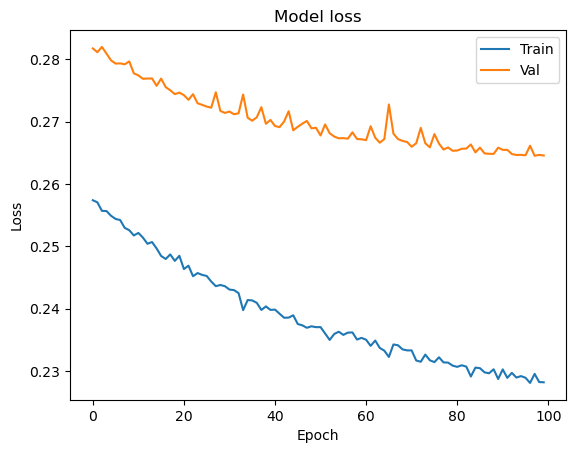

In [37]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

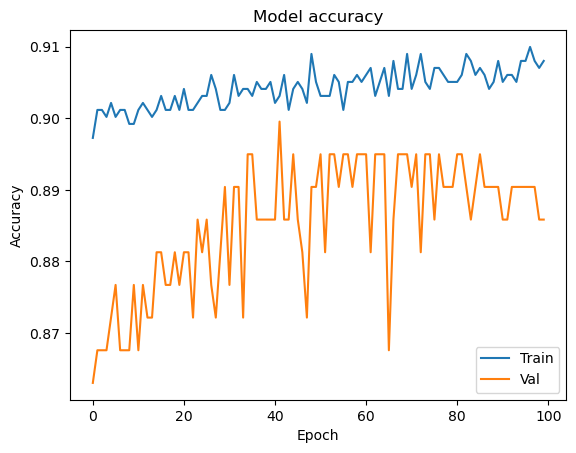

In [40]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [41]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 39ms/step - loss: 0.4592 - accuracy: 0.7759 - val_loss: 0.3888 - val_accuracy: 0.8402
Epoch 2/100
32/32 [==============================] - 1s 36ms/step - loss: 0.3427 - accuracy: 0.8552 - val_loss: 0.3137 - val_accuracy: 0.8219
Epoch 3/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2817 - accuracy: 0.8845 - val_loss: 0.2914 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2625 - accuracy: 0.8943 - val_loss: 0.3155 - val_accuracy: 0.8584
Epoch 5/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2666 - accuracy: 0.8894 - val_loss: 0.2778 - val_accuracy: 0.8767
Epoch 6/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2639 - accuracy: 0.8924 - val_loss: 0.2857 - val_accuracy: 0.8721
Epoch 7/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2417 - accuracy: 0.8982 - val_loss: 0.2761 - val_accuracy: 0.8950
Epoch 

32/32 [==============================] - 1s 36ms/step - loss: 0.1256 - accuracy: 0.9472 - val_loss: 0.4082 - val_accuracy: 0.8767
Epoch 59/100
32/32 [==============================] - 1s 36ms/step - loss: 0.1296 - accuracy: 0.9452 - val_loss: 0.5127 - val_accuracy: 0.8584
Epoch 60/100
32/32 [==============================] - 1s 37ms/step - loss: 0.1520 - accuracy: 0.9276 - val_loss: 0.3483 - val_accuracy: 0.8904
Epoch 61/100
32/32 [==============================] - 1s 37ms/step - loss: 0.1190 - accuracy: 0.9511 - val_loss: 0.4908 - val_accuracy: 0.8584
Epoch 62/100
32/32 [==============================] - 1s 37ms/step - loss: 0.1209 - accuracy: 0.9491 - val_loss: 0.4678 - val_accuracy: 0.8721
Epoch 63/100
32/32 [==============================] - 1s 37ms/step - loss: 0.1219 - accuracy: 0.9530 - val_loss: 0.4113 - val_accuracy: 0.8630
Epoch 64/100
32/32 [==============================] - 1s 38ms/step - loss: 0.1378 - accuracy: 0.9335 - val_loss: 0.5169 - val_accuracy: 0.8767
Epoch 65/100

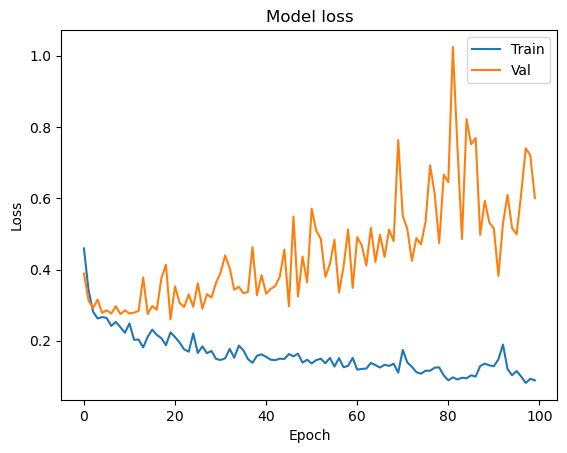

In [43]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

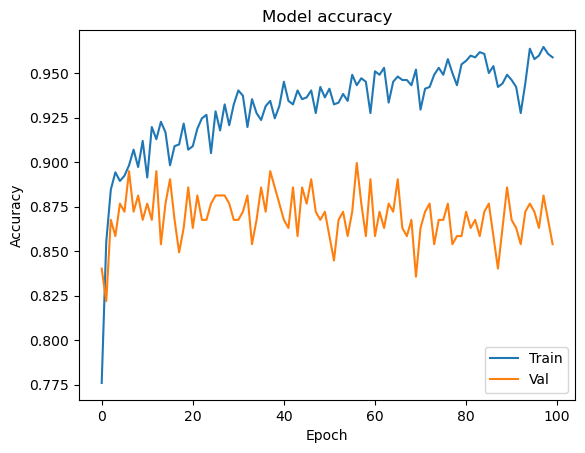

In [46]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [48]:
from keras.layers import Dropout
from keras import regularizers

In [50]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [51]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 47ms/step - loss: 14.2227 - accuracy: 0.6937 - val_loss: 3.8827 - val_accuracy: 0.7717
Epoch 2/100
32/32 [==============================] - 1s 43ms/step - loss: 1.6818 - accuracy: 0.8444 - val_loss: 0.7151 - val_accuracy: 0.8265
Epoch 3/100
32/32 [==============================] - 1s 42ms/step - loss: 0.5712 - accuracy: 0.8601 - val_loss: 0.5167 - val_accuracy: 0.8402
Epoch 4/100
32/32 [==============================] - 1s 42ms/step - loss: 0.5016 - accuracy: 0.8699 - val_loss: 0.4916 - val_accuracy: 0.8493
Epoch 5/100
32/32 [==============================] - 1s 44ms/step - loss: 0.4969 - accuracy: 0.8708 - val_loss: 0.5140 - val_accuracy: 0.8676
Epoch 6/100
32/32 [==============================] - 1s 42ms/step - loss: 0.4936 - accuracy: 0.8659 - val_loss: 0.4779 - val_accuracy: 0.8630
Epoch 7/100
32/32 [==============================] - 1s 44ms/step - loss: 0.4673 - accuracy: 0.8865 - val_loss: 0.4844 - val_accuracy: 0.8721
Epoch

32/32 [==============================] - 1s 43ms/step - loss: 0.4169 - accuracy: 0.8982 - val_loss: 0.4345 - val_accuracy: 0.8721
Epoch 59/100
32/32 [==============================] - 1s 41ms/step - loss: 0.4233 - accuracy: 0.8894 - val_loss: 0.4339 - val_accuracy: 0.8813
Epoch 60/100
32/32 [==============================] - 1s 42ms/step - loss: 0.4254 - accuracy: 0.8924 - val_loss: 0.4373 - val_accuracy: 0.8813
Epoch 61/100
32/32 [==============================] - 1s 42ms/step - loss: 0.4197 - accuracy: 0.9022 - val_loss: 0.4703 - val_accuracy: 0.8402
Epoch 62/100
32/32 [==============================] - 1s 42ms/step - loss: 0.4678 - accuracy: 0.8708 - val_loss: 0.4734 - val_accuracy: 0.8311
Epoch 63/100
32/32 [==============================] - 1s 44ms/step - loss: 0.4359 - accuracy: 0.8875 - val_loss: 0.4617 - val_accuracy: 0.8721
Epoch 64/100
32/32 [==============================] - 1s 43ms/step - loss: 0.4199 - accuracy: 0.8953 - val_loss: 0.4332 - val_accuracy: 0.8813
Epoch 65/100

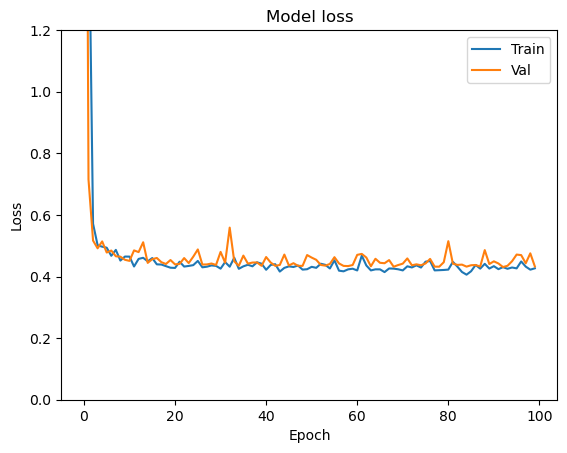

In [53]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

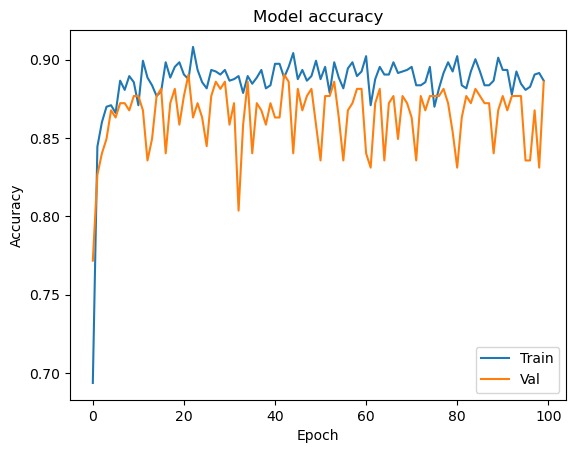

In [55]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()